# Importing libraries

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Generator and Discriminator Model Synthesis

In [2]:
def define_discriminator(n_inputs= 2):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units= 50,
                                 input_dim= n_inputs,
                                 kernel_initializer= 'he_uniform'))
    model.add(keras.layers.LeakyReLU(0.1))
    
    model.add(keras.layers.Dense(units= 1,
                                 activation= 'sigmoid'))
    model.compile(loss= 'binary_crossentropy',
                  optimizer= 'adam',
                  metrics= ['accuracy'])
    
    return model

In [3]:
def define_generator(latent_dim, n_outputs= 2):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units= 50,
                                 input_dim= latent_dim,
                                 kernel_initializer= 'he_uniform'))
    model.add(keras.layers.LeakyReLU(0.1))
    
    model.add(keras.layers.Dense(units= n_outputs,
                                 activation= 'linear'))
    
    return model

# GAN Model Synthesis

In [4]:
def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = keras.models.Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss= 'binary_crossentropy', optimizer= 'adam')
    
    return model

# Sample Generation

In [5]:
def generate_real_sample(n):
    X1 = np.linspace(-1,1, n)
    X2 = np.sin(X1 * 3 / 2 * np.pi)
    X1 = X1.reshape((n, 1))
    X2 = X2.reshape((n, 1))
    X = np.hstack((X1, X2))
    y = np.ones((n, 1))
    return X, y

In [6]:
def generate_latent_points(latent_dim, n):
    x_input = np.random.rand(latent_dim * n)
    x_input = x_input.reshape((n, latent_dim))
    return x_input

In [7]:
def generate_fake_sample(generator, latent_dim, n):
    x_input = generate_latent_points(latent_dim, n)
    X = generator.predict(x_input)
    y = np.zeros((n, 1))
    return X, y

# Performance Summarizing

In [8]:
def summarize_performance(epoch, generator, discriminator, latent_dim, n = 100):
    X_real, y_real = generate_real_sample(n)
    X_fake, y_fake = generate_fake_sample(generator= generator,
                                          latent_dim= latent_dim,
                                          n = n)
    _, acc_real = discriminator.evaluate(X_real, y_real, verbose= 0)
    _, acc_fake = discriminator.evaluate(X_fake, y_fake, verbose= 0)
    print(f'Epoch: {epoch + 1}, Acc_real: {acc_real}, Acc_fake: {acc_fake}')
    plt.scatter(X_real[:,0], X_real[:,1], color= 'red')
    plt.scatter(X_fake[:,0], X_fake[:,1], color= 'blue')
    file_name= f'Eval_Epoch{epoch + 1}.png'
    plt.savefig(file_name)
    plt.close()

# Function for training the model

In [9]:
def train(g_model, d_model, GAN_model, latent_dim, n_batch= 256, epochs = 50000):
    half_batch = int(n_batch / 2)
    for i in range(epochs):
        X_real, y_real = generate_real_sample(half_batch)
        X_fake, y_fake = generate_fake_sample(generator= g_model,
                                              latent_dim= latent_dim,
                                              n= half_batch)
        d_model.train_on_batch(X_real, y_real)
        d_model.train_on_batch(X_fake, y_fake)
        
        X_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = np.ones((n_batch, 1))
        GAN_model.train_on_batch(X_gan, y_gan)
        
        if (i+1)%2000 == 0:
            summarize_performance(epoch= i,
                                  generator= g_model,
                                  discriminator= d_model,
                                  latent_dim= latent_dim)

# Training the Model

In [10]:
latent_dim = 7
gen_model = define_generator(latent_dim= latent_dim)
dis_model = define_discriminator()
gan_model = define_gan(gen_model, dis_model)
train(g_model= gen_model, d_model= dis_model, GAN_model= gan_model, latent_dim= latent_dim)

C:\Users\moham\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch: 2000, Acc_real: 0.6000000238418579, Acc_fake: 0.9900000095367432
Epoch: 4000, Acc_real: 0.6899999976158142, Acc_fake: 0.7200000286102295
Epoch: 6000, Acc_real: 0.4399999976158142, Acc_fake: 1.0
Epoch: 8000, Acc_real: 0.6499999761581421, Acc_fake: 0.8600000143051147
Epoch: 10000, Acc_real: 0.6600000262260437, Acc_fake: 1.0
Epoch: 12000, Acc_real: 0.7200000286102295, Acc_fake: 1.0
Epoch: 14000, Acc_real: 0.7900000214576721, Acc_fake: 1.0
Epoch: 16000, Acc_real: 0.5899999737739563, Acc_fake: 0.9900000095367432
Epoch: 18000, Acc_real: 0.6200000047683716, Acc_fake: 0.9800000190734863
Epoch: 20000, Acc_real: 0.6299999952316284, Acc_fake: 1.0
Epoch: 22000, Acc_real: 0.7099999785423279, Acc_fake: 0.49000000953674316
Epoch: 24000, Acc_real: 0.5199999809265137, Acc_fake: 0.949999988079071
Epoch: 26000, Acc_real: 0.4399999976158142, Acc_fake: 0.6600000262260437
Epoch: 28000, Acc_real: 0.6000000238418579, Acc_fake: 0.8700000047683716
Epoch: 30000, Acc_real: 0.41999998688697815, Acc_fake: 1.

(100,)


ValueError: could not broadcast input array from shape (100,2) into shape (100)

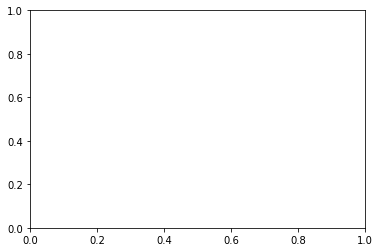

In [14]:
pnts = np.linspace(-1, 1, 100)

y = generate_fake_sample(generator= gen_model,latent_dim= 7, n= 100)
plt.plot(y)